In [2]:
#import library to model logistic
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
df = pd.read_csv('Iris.csv',encoding='utf-8',header=0,delimiter=',')
# Hiển thị một số dòng đầu của DataFrame
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']].head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df_Species = pd.get_dummies(df['Species'],drop_first=True)
df_Species

,Iris-versicolor,Iris-virginica
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
145,False,True
146,False,True
147,False,True
148,False,True


In [12]:
df.drop('Species',axis=1,inplace=True)
df=pd.concat([df,df_Species],axis=1)
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,False,False
1,2,4.9,3.0,1.4,0.2,False,False
2,3,4.7,3.2,1.3,0.2,False,False
3,4,4.6,3.1,1.5,0.2,False,False
4,5,5.0,3.6,1.4,0.2,False,False


In [13]:
X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']].values #input: đặc trưng
y=df[['Iris-versicolor']].values #output: mục tiêu

In [14]:
#input->model->output
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train.flatten())

LogisticRegression()

In [16]:
classifier.coef_

array([[-0.67665374, -2.16336717,  0.34033957]])

In [17]:
classifier.intercept_

array([8.31091911])

In [18]:
#Z=-1.29+0.319*NGONNGU-0.043*LOGIC+0.028*UNGXU
#=>f(z)=1/(1+e^-z) là hàm sigmoid
#đạo hàm f(z) nhỏ hơn 0.5 =>0, lớn hơn 0.05 =>1
X_test

array([[6.3, 3.3, 4.7],
       [5.2, 4.1, 1.5],
       [7. , 3.2, 4.7],
       [6.7, 3. , 5. ],
       [6.1, 2.9, 4.7],
       [4.8, 3. , 1.4],
       [6.6, 3. , 4.4],
       [4.7, 3.2, 1.6],
       [4.6, 3.2, 1.4],
       [5.6, 2.7, 4.2],
       [5. , 2. , 3.5],
       [6.2, 3.4, 5.4],
       [6.1, 2.6, 5.6],
       [4.9, 3.1, 1.5],
       [6.4, 3.1, 5.5],
       [5.5, 2.3, 4. ],
       [5. , 3.4, 1.5],
       [5. , 3.4, 1.6],
       [4.9, 2.5, 4.5],
       [6.3, 2.3, 4.4],
       [5.1, 3.4, 1.5],
       [4.4, 3.2, 1.3],
       [6. , 2.2, 5. ],
       [7.2, 3.6, 6.1],
       [6.4, 3.2, 4.5],
       [5.7, 2.8, 4.1],
       [6.8, 2.8, 4.8],
       [6.3, 3.4, 5.6],
       [7.2, 3. , 5.8],
       [5.1, 3.5, 1.4]])

In [19]:
#ngưỡng python là 0.5
y_pred_test=classifier.predict(X_test)
y_pred_test

array([False, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False,  True, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False])

In [20]:
print(classifier.predict_proba(X_test))
#cột trái là z cột phải là sigmoid

[[0.81630557 0.18369443]
 [0.97253454 0.02746546]
 [0.85180593 0.14819407]
 [0.73322844 0.26677156]
 [0.6203037  0.3796963 ]
 [0.72124486 0.27875514]
 [0.75907281 0.24092719]
 [0.77688155 0.22311845]
 [0.77695131 0.22304869]
 [0.47252943 0.52747057]
 [0.14281489 0.85718511]
 [0.80249294 0.19750706]
 [0.38592399 0.61407601]
 [0.76863383 0.23136617]
 [0.70145486 0.29854514]
 [0.27389748 0.72610252]
 [0.87183577 0.12816423]
 [0.86798451 0.13201549]
 [0.24630337 0.75369663]
 [0.36129447 0.63870553]
 [0.87920827 0.12079173]
 [0.75890596 0.24109404]
 [0.23267161 0.76732839]
 [0.90661932 0.09338068]
 [0.8039097  0.1960903 ]
 [0.55182397 0.44817603]
 [0.67131187 0.32868813]
 [0.80242913 0.19757087]
 [0.74594854 0.25405146]
 [0.90337713 0.09662287]]


In [21]:
#Changing threshold and predicting
#chọn ngưỡng là 0.65
print('prediction with threshold 0.65 :')
y_pred_test_new_threshold=(classifier.predict_proba(X_test)[:,1]>=0.65).astype(int)
y_pred_test_new_threshold

prediction with threshold 0.65 :


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [22]:
#default threshold=0.5
result=pd.DataFrame({'Actual': y_test.flatten(),'Predicted': y_pred_test})
result

,Actual,Predicted
0,True,False
1,False,False
2,True,False
3,True,False
4,True,False
5,False,False
6,True,False
7,False,False
8,False,False
9,True,True


In [23]:
from sklearn.metrics import accuracy_score
print("Dự báo:")
accuracy_score(y_test,y_pred_test)

Dự báo:


0.6333333333333333

In [24]:
#tp=(ac=1,pre=1)
#fp(ac=0,pre=1)
#pn(ac=1,pre=0)
#tn(ac=0,pre=0)
#tp tn dự báo đúng
#tổng là số lương mẫu dữ liệu
#ma trận confusion mỗi ô hiển thị tp fp fn tn
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred_test)
cf_matrix

array([[15,  3],
       [ 8,  4]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

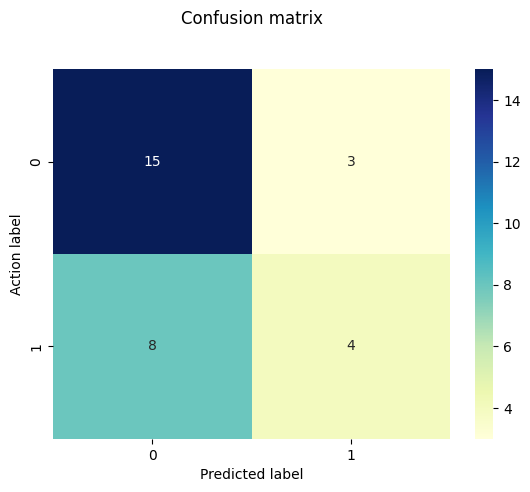

In [25]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Action label')
plt.xlabel('Predicted label')

In [26]:
#Các độ đo đánh giá mô hình phân lớp
#N là số lượng mẫu =TP+FP+FN+TN
#TP,FP,FN,FN
#accurary=(TP+TN)/(TP+FP+FN+TN)
#precision=TP/(TP+FP)
#recall=TP/(TP+FN)
#F1-Score=2*precision*Recall/(Precision+Recall)
from sklearn.metrics import classification_report
target_names=['Not oriented','Oriented']
print(classification_report(y_test,y_pred_test,target_names=target_names))

              precision    recall  f1-score   support

Not oriented       0.65      0.83      0.73        18
    Oriented       0.57      0.33      0.42        12

    accuracy                           0.63        30
   macro avg       0.61      0.58      0.58        30
weighted avg       0.62      0.63      0.61        30



In [27]:
#lưu trữ vô mình xuống thiết bị
import pickle
pickle.dump(classifier, open('model_logistic_regression.sav','wb'))

In [28]:
#load storage
import pickle
loaded_model=pickle.load(open('model_logistic_regression.sav','rb'))
vNN=float(input('SepalLengthCm: '))
vLG=float(input('SepalWidthCm: '))
vUX=float(input('PetalLengthCm: '))
y_pred=loaded_model.predict([[vNN,vLG,vUX]])
print('Dự báo định hướng: '+str(y_pred[0]))

Dự báo định hướng: True
